In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import csv
from scipy.stats import pearsonr
import glob

In [2]:
def get_domain_df(data_csv):
    data = []
    with open(data_csv, 'r') as file:
        csv_reader = csv.reader(file, delimiter=',')
        for row in csv_reader:
            if row[0] == '':
                continue
            l1 = row[1]
            l2 = row[2]
            alignment = float(row[3])
            w1 = row[4]
            w2 = row[5]
            domain = row[16]
            data.append(dict(l1=l1, 
                             l2=l2, 
                             alignment=alignment, 
                             w1=w1, 
                             w2=w2, 
                             domain=domain))

    lin_data = []
    files = glob.glob('../compute-alignment/w=*')
    for fn in files:
        with open(fn, 'r') as file:
            langs = fn.replace('../compute-alignment/w=', '').split('.')[0].split('-')
            l1, l2 = langs
            csv_reader = csv.reader(file, delimiter=',')
            for row in csv_reader:
                if row[0] == 'l1':
                    continue
                w1 = row[2]
                w2 = row[3]
                alignment = float(row[4])
                lin_data.append(dict(l1=l1, 
                                     l2=l2,
                                     w1=w1,
                                     w2=w2,
                                     linear_alignment=alignment))

    lin_df = pd.DataFrame(lin_data)

    df = pd.DataFrame(data)

    df = pd.merge(df, lin_df, how='left', on=['l1', 'l2', 'w1', 'w2'])
    df = df[df['linear_alignment'].notnull()]
#     df = df.groupby('domain').mean()
#     df = df.sort_values(by='alignment')

#     df = df.sort_values(by='linear_alignment')
    
    return df

lang_map = dict()
with open('data/distances/FAIR_languages_glotto_xdid.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader: 
        if row[0] == 'Language':
            continue
        full = row[0]
        short = row[8]
        lang_map[short] = full

In [38]:
df = get_domain_df('../alignments-nel-wiki-trl.csv')

In [39]:
alignments = df['alignment'].to_numpy()
linear_alignments = df['linear_alignment'].to_numpy()

print('Alignment correlation with linear alignment:', pearsonr(alignments, linear_alignments)[0])

Alignment correlation with linear alignment: 0.5568149912028446


In [40]:
df_counts = df
df_counts = df_counts.groupby(['l1', 'l2']).agg(['mean', 'size']).reset_index()
df_counts['l1'] = df_counts['l1'].map(lambda x: lang_map[x])
df_counts['l2'] = df_counts['l2'].map(lambda x: lang_map[x])
df_counts.columns = ['_'.join(col).strip() for col in df_counts.columns.values]

Alignment correlation with counts: 0.7426077974164016


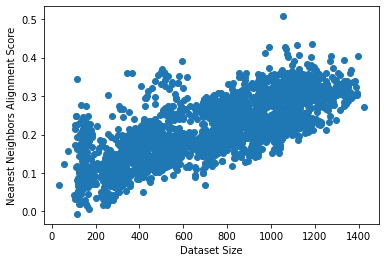

In [43]:
alignments = df_counts['alignment_mean'].to_numpy()
counts = df_counts['alignment_size'].to_numpy()

plt.scatter(counts, alignments)
plt.xlabel('Dataset Size')
plt.ylabel('Nearest Neighbors Alignment Score')
plt.savefig('alignment_scatter.pdf')
plt.savefig('alignment_scatter.png')
print('Alignment correlation with counts:', pearsonr(alignments, counts)[0])

Linear alignment correlation with counts: 0.06539148641794897


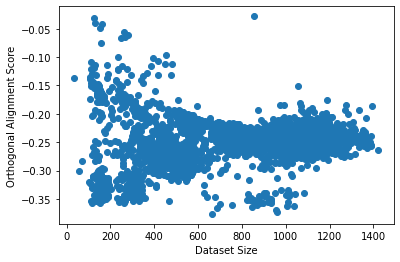

In [44]:
alignments = df_counts['linear_alignment_mean'].to_numpy() * 100
counts = df_counts['linear_alignment_size'].to_numpy()

plt.scatter(counts, alignments)
plt.xlabel('Dataset Size')
plt.ylabel('Orthogonal Alignment Score')
plt.savefig('ortho_alignment_scatter.pdf')
plt.savefig('ortho_alignment_scatter.png')
print('Linear alignment correlation with counts:', pearsonr(alignments, counts)[0])

In [34]:
df_counts_concept = df
df_counts_concept = df_counts_concept.groupby(['l1', 'l2', 'domain']).agg(['mean', 'size']).reset_index()
# df_counts_concept = df_counts_concept.groupby(['domain']).agg(['mean', 'size']).reset_index()
# df_counts_concept['l1'] = df_counts_concept['l1'].map(lambda x: lang_map[x])
# df_counts_concept['l2'] = df_counts_concept['l2'].map(lambda x: lang_map[x])
df_counts_concept.columns = ['_'.join(col).strip() for col in df_counts_concept.columns.values]

In [35]:
align = df_counts_concept['alignment_mean'].to_numpy()
count = df_counts_concept['alignment_size'].to_numpy()

pearsonr(align, count)

(0.3902623224870374, 0.0)

In [36]:
align = df_counts_concept['linear_alignment_mean'].to_numpy()
count = df_counts_concept['alignment_size'].to_numpy()

pearsonr(align, count)

(-0.03984413414904774, 7.754598323136867e-08)

In [37]:
df_counts_concept

,l1_,l2_,domain_,alignment_mean,alignment_size,linear_alignment_mean,linear_alignment_size
0,ab,ar,Agriculture and vegetation,0.100096,2,-0.003859,2
1,ab,ar,Animals,0.037567,2,-0.003910,2
2,ab,ar,Basic actions and technology,0.090920,16,-0.003663,16
3,ab,ar,Cognition,0.060769,6,-0.003502,6
4,ab,ar,Emotions and values,-0.013974,2,-0.003807,2
...,...,...,...,...,...,...,...
18166,xal,te,Speech and language,0.024015,11,-0.003156,11
18167,xal,te,The body,0.029299,19,-0.003291,19
18168,xal,te,The house,0.064382,6,-0.003151,6
18169,xal,te,The physical world,0.026042,22,-0.003259,22
